# 🧠 Notebook complet - Approches avancées Air Paradis

Ce notebook couvre les prétraitements, embeddings, modèles Keras (dense, LSTM), BERT et Universal Sentence Encoder selon les critères CE1 à CE7.

In [1]:
# 📚 Table des matières automatique
from IPython.display import display, Markdown
display(Markdown('''
- [1. Import du jeu de données et vérification de l'équilibrage](#1.-Import-du-jeu-de-données-et-vérification-de-l'équilibrage)
- [2. Prétraitement du texte (nettoyage + stemming/lemmatisation)](#2.-Prétraitement-du-texte-(nettoyage-+-stemming/lemmatisation))
- [3.1 Baseline : TF-IDF + Régression Logistique](#3.1-Baseline-:-TF-IDF-+-Régression-Logistique)
- [3.2 Baseline : LSTM (Keras)](#3.2-Baseline-:-LSTM-(Keras))
- [4. Embeddings Word2Vec, GloVe, FastText](#4.-Embeddings-Word2Vec,-GloVe,-FastText)
  - [4.1 Chargement des embeddings GloVe et FastText](#4.1-Chargement-des-embeddings-GloVe-et-FastText)
- [5. Modèles Keras avec embeddings](#5.-Modèles-Keras-avec-embeddings)
  - [5.0 Intégration GloVe et FastText dans Keras](#5.0-Intégration-GloVe-et-FastText-dans-Keras)
  - [5.1 Modèle Keras avec Word2Vec](#5.1-Modèle-Keras-avec-Word2Vec)
  - [5.2 Modèle Keras avec GloVe](#5.2-Modèle-Keras-avec-GloVe)
  - [5.3 Modèle Keras avec FastText](#5.3-Modèle-Keras-avec-FastText)
- [6. BERT - Fine-tuning HuggingFace](#6.-BERT---Fine-tuning-HuggingFace)
- [7. Universal Sentence Encoder](#7.-Universal-Sentence-Encoder)
- [8. Synthèse comparative des modèles](#8.-Synthèse-comparative-des-modèles)
'''))



- [1. Import du jeu de données et vérification de l'équilibrage](#1.-Import-du-jeu-de-données-et-vérification-de-l'équilibrage)
- [2. Prétraitement du texte (nettoyage + stemming/lemmatisation)](#2.-Prétraitement-du-texte-(nettoyage-+-stemming/lemmatisation))
- [3.1 Baseline : TF-IDF + Régression Logistique](#3.1-Baseline-:-TF-IDF-+-Régression-Logistique)
- [3.2 Baseline : LSTM (Keras)](#3.2-Baseline-:-LSTM-(Keras))
- [4. Embeddings Word2Vec, GloVe, FastText](#4.-Embeddings-Word2Vec,-GloVe,-FastText)
  - [4.1 Chargement des embeddings GloVe et FastText](#4.1-Chargement-des-embeddings-GloVe-et-FastText)
- [5. Modèles Keras avec embeddings](#5.-Modèles-Keras-avec-embeddings)
  - [5.0 Intégration GloVe et FastText dans Keras](#5.0-Intégration-GloVe-et-FastText-dans-Keras)
  - [5.1 Modèle Keras avec Word2Vec](#5.1-Modèle-Keras-avec-Word2Vec)
  - [5.2 Modèle Keras avec GloVe](#5.2-Modèle-Keras-avec-GloVe)
  - [5.3 Modèle Keras avec FastText](#5.3-Modèle-Keras-avec-FastText)
- [6. BERT - Fine-tuning HuggingFace](#6.-BERT---Fine-tuning-HuggingFace)
- [7. Universal Sentence Encoder](#7.-Universal-Sentence-Encoder)
- [8. Synthèse comparative des modèles](#8.-Synthèse-comparative-des-modèles)


In [2]:
import mlflow

mlflow.set_tracking_uri("http://localhost:8080")

mlflow.set_experiment("sentiment_analysis")


2025/04/24 09:19:09 INFO mlflow.tracking.fluent: Experiment with name 'sentiment_analysis' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/750608397458522352', creation_time=1745500749339, experiment_id='750608397458522352', last_update_time=1745500749339, lifecycle_stage='active', name='sentiment_analysis', tags={}>

In [ ]:
# import tensorflow as tf
# import ctypes
# from pathlib import Path

# print("🧠 Version TF :", tf.__version__)
# print("🚀 GPU détecté :", tf.config.list_physical_devices('GPU'))

# # Vérification du fichier cuDNN
# cudnn_path = "C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v12.2/bin/cudnn64_8.dll"
# print("\n🔍 Fichier cuDNN (cudnn64_8.dll) présent ?")
# print("➡️", Path(cudnn_path).exists())

# print("\n📦 Tentative de chargement de la DLL cuDNN...")

# try:
#     ctypes.WinDLL(cudnn_path)
#     print("✅ cuDNN chargé avec succès !")
# except Exception as e:
#     print("❌ Erreur lors du chargement de cuDNN :", e)


🧠 Version TF : 2.18.0
🚀 GPU détecté : []

🔍 Fichier cuDNN (cudnn64_8.dll) présent ?
➡️ True

📦 Tentative de chargement de la DLL cuDNN...
✅ cuDNN chargé avec succès !


In [3]:
# # 📊 Évaluation du modèle avec métriques + efficacité
# # 🔍 Fonction d'évaluation étendue : performances + légèreté
# import tempfile
# import time
# import joblib
# import os
# import numpy as np
# from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
# from tensorflow.keras.models import save_model

# def eval_model_extended(model, X_val, y_val, model_name="Modèle", keras=False):
#     print(f"\n📌 Évaluation du modèle : {model_name}")
#     print("-------------------------------------")

#     # Inference & timing
#     start = time.time()
#     y_pred = model.predict(X_val)
#     # elapsed = (time.time() - start) / len(X_val) * 1000  # ms/tweet
#     elapsed = (time.time() - start) / X_val.shape[0] * 1000  # ms/tweet

#     y_pred_label = (y_pred > 0.5).astype(int)
#     acc = accuracy_score(y_val, y_pred_label)
#     f1 = f1_score(y_val, y_pred_label)
#     rec = recall_score(y_val, y_pred_label)

#     print(f"✅ Accuracy : {acc:.4f}")
#     print(f"✅ F1-score : {f1:.4f}")
#     print(f"✅ Recall : {rec:.4f}")

#     # Taille du modèle
#     tmp_path = tempfile.mktemp(suffix=".h5")
#     # tmp_path = tempfile.mktemp()
#     if keras:
#         # save_model(model, tmp_path, save_format='h5')
#         save_model(model, tmp_path + ".h5")
#     else:
#         joblib.dump(model, tmp_path)

#     # Attendre que le fichier existe avant de le mesurer
#     if os.path.exists(tmp_path):    
#         size_mb = os.path.getsize(tmp_path) / 1024 / 1024
#         os.remove(tmp_path)  # Supprimer le fichier temporaire après la mesure
#         print(f"💾 Taille du modèle : {size_mb:.2f} Mo")
#         print(f"⚡ Temps d'inférence moyen : {elapsed:.2f} ms / tweet")
#     else:
#         print("❗ Le fichier de modèle n’a pas été généré. Impossible de mesurer sa taille.")
        
#     # Nombre de paramètres
#     try:
#         if keras:
#             print(f"🧠 Nb paramètres : {model.count_params()}")
#         elif hasattr(model, 'num_parameters'):
#             print(f"🧠 Nb paramètres : {model.num_parameters()}")
#     except:
#         pass


## 1. Import du jeu de données et vérification de l'équilibrage

In [1]:
# 📥 Chargement du fichier CSV d'origine
# Chargement du fichier CSV d'origine fourni (colonnes : target, id, date, flag, user, text)
import pandas as pd

input_path = 'C:/Users/sandr/OneDrive/Documents/JOB/OPENCLASSROOMS/AI_ENGINEER/Projet_7_Réalisez_une_analyse_de_sentiments_grâce_au_Deep_Learning/Workspace/'

raw_df = pd.read_csv(input_path + "data/raw/training.1600000.processed.noemoticon.csv", encoding="latin-1", header=None)

raw_df.columns = ["sentiment", "id", "date", "flag", "user", "text"]
raw_df['sentiment'] = raw_df['sentiment'].replace({0: 0, 4: 1})  # 0: négatif, 4: positif

# On extrait uniquement le texte et le label
df = raw_df[["text", "sentiment"]].copy()
df.head()


,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


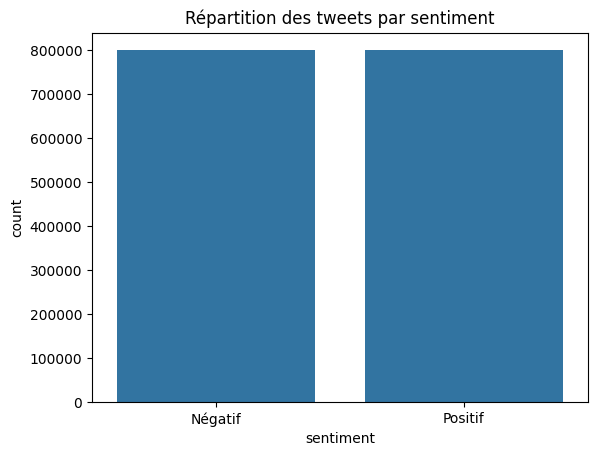

Répartition (%):
sentiment
0    50.0
1    50.0
Name: proportion, dtype: float64


In [2]:
# %pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='sentiment')
plt.title("Répartition des tweets par sentiment")
plt.xticks([0,1], ['Négatif', 'Positif'])
plt.show()

counts = df['sentiment'].value_counts(normalize=True)
print("Répartition (%):")
print(counts * 100)


## 3. Echantillonnage stratifié

In [3]:
# # 🚦 Détection RAM et définition de SAMPLE_SIZE
# import psutil
from sklearn.model_selection import train_test_split

# total_ram_gb = psutil.virtual_memory().total / 1024**3
# if total_ram_gb < 4:
#     SAMPLE_SIZE = 5000
# elif total_ram_gb < 8:
#     SAMPLE_SIZE = 10000
# elif total_ram_gb < 12:
#     SAMPLE_SIZE = 20000
# else:
#     SAMPLE_SIZE = 30000

# print(f"💡 RAM détectée : {total_ram_gb:.1f} Go - SAMPLE_SIZE sélectionné : {SAMPLE_SIZE}")

SAMPLE_SIZE = 1000  # Pour tests rapides

# 🎯 Échantillonnage stratifié unique (commune à tous les modèles)
df_sample, _ = train_test_split(
    df,
    train_size=SAMPLE_SIZE,
    stratify=df['sentiment'],
    random_state=42
)

print(f"Échantillon stratifié : {df_sample.shape[0]} tweets")


Échantillon stratifié : 1000 tweets


Vérifions l'équilibre de l'échantillon.

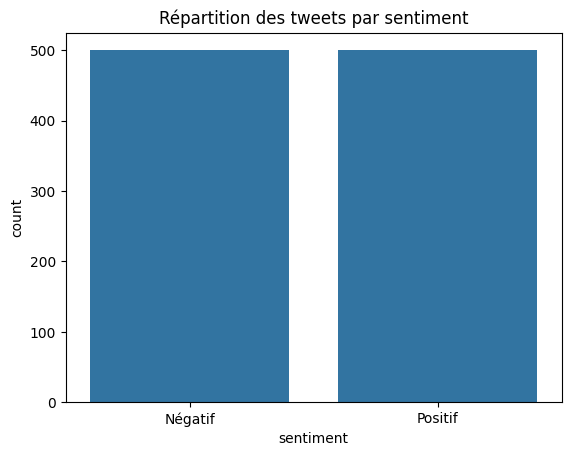

Répartition (%):
sentiment
1    50.0
0    50.0
Name: proportion, dtype: float64


In [4]:
sns.countplot(data=df_sample, x='sentiment')
plt.title("Répartition des tweets par sentiment")
plt.xticks([0,1], ['Négatif', 'Positif'])
plt.show()

counts = df_sample['sentiment'].value_counts(normalize=True)
print("Répartition (%):")
print(counts * 100)


L'échantillon est effectivement équilibré.

## 2. Prétraitement du texte (nettoyage + stemming/lemmatisation)

In [5]:
# 🧹 Nettoyage des tweets avec stemming et lemmatisation
# Nettoyage des tweets à partir du fichier brut
# %pip install nltk

import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text, method='lemma'):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"@\w+|#", '', text)
    text = re.sub(r"[^\w\s]", '', text.lower())
    words = nltk.word_tokenize(text)
    words = [w for w in words if w not in stop_words]
    if method == 'stem':
        return ' '.join([stemmer.stem(w) for w in words])
    else:
        return ' '.join([lemmatizer.lemmatize(w) for w in words])

# Application sur le jeu de données brut
df_sample['text_stem'] = df_sample['text'].apply(lambda x: clean_text(x, 'stem'))
df_sample['text_lemma'] = df_sample['text'].apply(lambda x: clean_text(x, 'lemma'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sandr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sandr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sandr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sandr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# 📦 Initialisation de MLflow enrichie pour suivi des performances et efficacité
# import mlflow
import mlflow.sklearn
import time
import os

mlflow.set_experiment("air_paradis_sentiment")

def log_model_metrics(model, X_val, y_val, model_name, keras=False):
    with mlflow.start_run(run_name=model_name):
        start = time.time()
        y_pred = model.predict(X_val)
        elapsed = (time.time() - start) / X_val.shape[0] * 1000  # ms/sample

        if y_pred.ndim > 1:
            y_pred = y_pred.ravel()
        y_pred_label = (y_pred > 0.5).astype(int)

        from sklearn.metrics import accuracy_score, f1_score, recall_score
        acc = accuracy_score(y_val, y_pred_label)
        f1 = f1_score(y_val, y_pred_label)
        rec = recall_score(y_val, y_pred_label)

        mlflow.log_param("model_type", model_name)
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("recall", rec)
        mlflow.log_metric("inference_time_ms", elapsed)

        import tempfile
        if keras:
            from tensorflow.keras.models import save_model
            model_path = tempfile.mktemp(suffix=".h5")
            save_model(model, model_path)
        else:
            import joblib
            model_path = tempfile.mktemp(suffix=".pkl")
            joblib.dump(model, model_path)

        if os.path.exists(model_path):
            size_mb = os.path.getsize(model_path) / 1024 / 1024
            mlflow.log_metric("model_size_mb", size_mb)
            mlflow.log_artifact(model_path, artifact_path="models")


In [7]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score
import tempfile
import os

def eval_model_extended(model, X_val, y_val, model_name="Model", keras=False, verbose=True):
    if verbose:
        print(f"\n📌 Évaluation du modèle : {model_name}")
        print("-" * 37)

    # ⚙️ Prédiction
    y_pred = model.predict(X_val)

    # 🔁 Conversion si nécessaire
    if y_pred.ndim > 1:
        y_pred = y_pred.ravel()
    if keras:
        y_pred = (y_pred > 0.5).astype(int)

    # 📊 Métriques
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)

    if verbose:
        print(f"✅ Accuracy : {acc:.4f}")
        print(f"✅ F1-score : {f1:.4f}")
        print(f"✅ Recall : {recall:.4f}")

    # 💾 Taille du modèle
    try:
        tmp_path = tempfile.mktemp(suffix=".keras" if keras else ".pkl")
        if keras:
            model.save(tmp_path)  # Plus de `save_format` en Keras 3+
        else:
            import joblib
            joblib.dump(model, tmp_path)

        size_mb = os.path.getsize(tmp_path) / 1024 / 1024
        os.remove(tmp_path)

        if verbose:
            print(f"💾 Taille du modèle : {size_mb:.2f} Mo")
    except Exception as e:
        if verbose:
            print("❗ Le fichier de modèle n’a pas été généré. Impossible de mesurer sa taille.")
            print(f"  Raison : {e}")


## 3.1 Baseline : TF-IDF + Régression Logistique

Paramétrer MLFlow pour stocker les résultats des tests  !!!

In [8]:
# 📊 TF-IDF + Régression Logistique
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df_sample['text_lemma'])

# Séparation
from sklearn.model_selection import train_test_split
X_train_vec, X_temp_vec, y_train, y_temp = train_test_split(X_tfidf, df_sample['sentiment'], test_size=0.3, stratify=df_sample['sentiment'], random_state=42)
X_val_vec, X_test_vec, y_val, y_test = train_test_split(X_temp_vec, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Entraînement
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

# Évaluation
eval_model_extended(model, X_val_vec, y_val, "TF-IDF + LogReg", keras=False)

log_model_metrics(model, X_val_vec, y_val, "TF-IDF + LogReg", keras=False)



📌 Évaluation du modèle : TF-IDF + LogReg
-------------------------------------
✅ Accuracy : 0.7067
✅ F1-score : 0.7105
✅ Recall : 0.7200
💾 Taille du modèle : 0.02 Mo


In [9]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression

# # 🔢 Paramètres
# # SAMPLE_SIZE = 10000  # à ajuster selon ta RAM
# MAX_FEATURES = 5000

# # 🎯 Échantillonnage stratifié
# # df_sample, _ = train_test_split(
# #     df,
# #     train_size=SAMPLE_SIZE,
# #     stratify=df['sentiment'],
# #     random_state=42
# # )

# # 🧠 Vectorisation TF-IDF
# vectorizer = TfidfVectorizer(max_features=MAX_FEATURES)
# X_tfidf = vectorizer.fit_transform(df_sample['text_lemma'])
# y = df_sample['sentiment']

# # ✂️ Séparation train / val / test stratifiée
# X_train_vec, X_temp_vec, y_train, y_temp = train_test_split(
#     X_tfidf, y, test_size=0.3, stratify=y, random_state=42
# )
# X_val_vec, X_test_vec, y_val, y_test = train_test_split(
#     X_temp_vec, y_temp, test_size=0.5, stratify=y_temp, random_state=42
# )

# # 🚀 Entraînement du modèle
# model = LogisticRegression(max_iter=200)
# model.fit(X_train_vec, y_train)

# # 🧪 Évaluation
# eval_model_extended(model, X_val_vec, y_val, "TF-IDF + LogReg", keras=False)
# log_model_metrics(model, X_val_vec, y_val, "TF-IDF + LogReg", keras=False)


## 3.2 Baseline : LSTM (Keras)

In [10]:
# 📊 LSTM Baseline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Préparation des données
tokenizer = Tokenizer(num_words=20000, oov_token='<OOV>')
tokenizer.fit_on_texts(df_sample['text_lemma'])
X_seq = tokenizer.texts_to_sequences(df_sample['text_lemma'])
X_pad = pad_sequences(X_seq, maxlen=50)

X_train, X_temp, y_train, y_temp = train_test_split(X_pad, df_sample['sentiment'], test_size=0.3, stratify=df_sample['sentiment'], random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Modèle LSTM
model_lstm = Sequential([
    Embedding(input_dim=20000, output_dim=64, input_length=50),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3, batch_size=128)

# Évaluation
eval_model_extended(model_lstm, X_val, y_val, "LSTM Baseline", keras=True)

log_model_metrics(model_lstm, X_val, y_val, "LSTM Baseline", keras=True)







Epoch 1/3
Epoch 1/3




6/6 [==============================] - 5s 236ms/step - loss: 0.6932 - accuracy: 0.5143 - val_loss: 0.6926 - val_accuracy: 0.5333
Epoch 2/3
6/6 [==============================] - 5s 236ms/step - loss: 0.6932 - accuracy: 0.5143 - val_loss: 0.6926 - val_accuracy: 0.5333
Epoch 2/3
6/6 [==============================] - 0s 73ms/step - loss: 0.6885 - accuracy: 0.6514 - val_loss: 0.6912 - val_accuracy: 0.5067
Epoch 3/3
6/6 [==============================] - 0s 73ms/step - loss: 0.6885 - accuracy: 0.6514 - val_loss: 0.6912 - val_accuracy: 0.5067
Epoch 3/3
6/6 [==============================] - 0s 81ms/step - loss: 0.6794 - accuracy: 0.6757 - val_loss: 0.6887 - val_accuracy: 0.5333

📌 Évaluation du modèle : LSTM Baseline
-------------------------------------

📌 Évaluation du modèle : LSTM Baseline
-------------------------------------
5/5 [==============================] - 1s 8ms/step
✅ Accuracy : 0.5333
✅ F1-score : 0.6392
✅ Recall : 0.8267
✅ Accuracy : 0.5333
✅ F1

C:\Users\sandr\AppData\Local\Temp\ipykernel_21284\1609296360.py:34: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, model_path)


In [11]:
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import psutil

# # 🚦 Étape 1 : détection de la RAM et SAMPLE_SIZE
# total_ram_gb = psutil.virtual_memory().total / 1024**3

# if total_ram_gb < 4:
#     SAMPLE_SIZE = 5000
# elif total_ram_gb < 8:
#     SAMPLE_SIZE = 10000
# elif total_ram_gb < 12:
#     SAMPLE_SIZE = 20000
# else:
#     SAMPLE_SIZE = 30000

# print(f"💡 RAM détectée : {total_ram_gb:.1f} Go - SAMPLE_SIZE sélectionné : {SAMPLE_SIZE}")

# 🔢 Paramètres
# SAMPLE_SIZE = 10000  # à ajuster selon ta RAM
# MAX_FEATURES = 5000

# 🎯 Étape 2 : échantillonnage stratifié
# df_sample_lstm, _ = train_test_split(
#     df,
#     train_size=SAMPLE_SIZE,
#     stratify=df['sentiment'],
#     random_state=42
# )

# # 🔤 Étape 3 : préparation des séquences
# tokenizer = Tokenizer(num_words=20000, oov_token='<OOV>')
# tokenizer.fit_on_texts(df_sample['text_lemma'])

# X_seq = tokenizer.texts_to_sequences(df_sample['text_lemma'])
# X_pad = pad_sequences(X_seq, maxlen=50)
# # y = df_sample_lstm['sentiment']
# y = df_sample['sentiment']

# # ✂️ Étape 4 : split train / val / test
# X_train, X_temp, y_train, y_temp = train_test_split(
#     X_pad, y, test_size=0.3, stratify=y, random_state=42
# )
# X_val, X_test, y_val, y_test = train_test_split(
#     X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
# )

# # 🧠 Étape 5 : Modèle LSTM
# model_lstm = Sequential([
#     Embedding(input_dim=20000, output_dim=64, input_length=50),
#     LSTM(64),
#     Dense(1, activation='sigmoid')
# ])
# model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # 🚀 Étape 6 : Entraînement
# model_lstm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3, batch_size=128)

# # 🧪 Étape 7 : Évaluation
# eval_model_extended(model_lstm, X_val, y_val, "LSTM Baseline", keras=True)
# log_model_metrics(model_lstm, X_val, y_val, "LSTM Baseline", keras=True)


LSTM tout seul = Fait
LSTM + Word2Vec
LSTM + Fastext


## 4. Embeddings Word2Vec, GloVe, FastText

In [12]:
# Si X_train contient des vecteurs → il faut retourner au texte
# Exemple : on repart de la colonne text_lemma du DataFrame de base
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')

X_train_idx, _, y_train, _ = train_test_split(df_sample.index, df_sample['sentiment'], test_size=0.3, stratify=df_sample['sentiment'], random_state=42)

# Exemple : extraction du texte source
X_train_text = df_sample.loc[X_train_idx, "text_lemma"]  # ou bien une version déjà séparée

sentences = [text.split() for text in X_train_text]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)
w2v_model.save(input_path + "models/word2vec.model")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sandr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 4.1 Chargement des embeddings GloVe et FastText

In [13]:
# 📚 Fonction utilitaire pour charger des embeddings externes (GloVe/FastText)
import numpy as np

def load_embedding(filepath):
    embeddings_index = {}
    with open(filepath, encoding='utf-8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Chemins vers les fichiers d'embedding
glove_path = input_path + 'data/embeddings/glove.6B.100d.txt'
fasttext_path = input_path + 'data/embeddings/wiki-news-300d-1M.vec'

# Chargement
glove_embeddings = load_embedding(glove_path)
fasttext_embeddings = load_embedding(fasttext_path)

print(f"GloVe chargé : {len(glove_embeddings)} mots")
print(f"FastText chargé : {len(fasttext_embeddings)} mots")


GloVe chargé : 400000 mots
FastText chargé : 999995 mots


## 5. Modèles Keras avec embeddings

### 5.1 Modèle Keras avec Word2Vec

In [14]:
# 🧠 Construction du modèle Keras avec couche d'embedding
# 📏 Padding des séquences textuelles à longueur fixe
# 🔢 Tokenisation des textes pour entraînement LSTM ou Dense
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = df_sample['text_lemma']
y = df_sample['sentiment']

X_train_text, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val_text, X_test_text, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_text)
X_train_pad = pad_sequences(tokenizer.texts_to_sequences(X_train_text), maxlen=50)
X_val_pad = pad_sequences(tokenizer.texts_to_sequences(X_val_text), maxlen=50)

model_w2v = Sequential([
    Embedding(20000, 64, input_length=50),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model_w2v.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_w2v.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=5, batch_size=128)

eval_model_extended(model_w2v, X_val_pad, y_val, "Word2Vec", keras=True)
log_model_metrics(model_w2v, X_val_pad, y_val, "Word2Vec", keras=True)


Epoch 1/5
6/6 [==============================] - 1s 56ms/step - loss: 0.6936 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5067
Epoch 2/5
6/6 [==============================] - 1s 56ms/step - loss: 0.6936 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5067
Epoch 2/5
6/6 [==============================] - 0s 23ms/step - loss: 0.6926 - accuracy: 0.5400 - val_loss: 0.6930 - val_accuracy: 0.5333
Epoch 3/5
6/6 [==============================] - 0s 23ms/step - loss: 0.6926 - accuracy: 0.5400 - val_loss: 0.6930 - val_accuracy: 0.5333
Epoch 3/5
6/6 [==============================] - 0s 27ms/step - loss: 0.6921 - accuracy: 0.5771 - val_loss: 0.6928 - val_accuracy: 0.5267
Epoch 4/5
6/6 [==============================] - 0s 27ms/step - loss: 0.6921 - accuracy: 0.5771 - val_loss: 0.6928 - val_accuracy: 0.5267
Epoch 4/5
6/6 [==============================] - 0s 26ms/step - loss: 0.6916 - accuracy: 0.5571 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 5/5
6/6 [===================

C:\Users\sandr\AppData\Local\Temp\ipykernel_21284\1609296360.py:34: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, model_path)


In [15]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Initialisation du tokenizer
# tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
# tokenizer.fit_on_texts(X_train_text)  # X_train_text contient le texte brut

# # Tokenisation + padding
# X_train_seq = tokenizer.texts_to_sequences(X_train_text)
# X_val_seq = tokenizer.texts_to_sequences(X_val_text)

# X_train_pad = pad_sequences(X_train_seq, maxlen=50)
# X_val_pad = pad_sequences(X_val_seq, maxlen=50)


### 5.5 LSTM + Word2Vec

In [16]:
# 📊 Modèle LSTM avec Word2Vec
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

model_lstm_w2v = Sequential([
    Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1],
              weights=[embedding_matrix], input_length=X_train_pad.shape[1], trainable=False),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model_lstm_w2v.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm_w2v.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=3, batch_size=128)

eval_model_extended(model_lstm_w2v, X_val_pad, y_val, "LSTM + Word2Vec", keras=True)
log_model_metrics(model_lstm_w2v, X_val_pad, y_val, "LSTM + Word2Vec", keras=True)


Epoch 1/3
6/6 [==============================] - 3s 154ms/step - loss: 0.6935 - accuracy: 0.4957 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/3
6/6 [==============================] - 3s 154ms/step - loss: 0.6935 - accuracy: 0.4957 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/3
6/6 [==============================] - 0s 42ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/3
6/6 [==============================] - 0s 42ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/3
6/6 [==============================] - 0s 55ms/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5000

📌 Évaluation du modèle : LSTM + Word2Vec
-------------------------------------

📌 Évaluation du modèle : LSTM + Word2Vec
-------------------------------------
5/5 [==============================] - 1s 7ms/step
✅ Accuracy : 0.5000
✅ F1-score : 0.0000
✅ Recall : 0.0000
💾 Taille du modèle : 1.38 Mo
✅ Accuracy

C:\Users\sandr\AppData\Local\Temp\ipykernel_21284\1609296360.py:34: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, model_path)


### 5.6 LSTM + FastText

In [17]:
# # Entrainement du modèle FastText
# from gensim.models import FastText

# sentences = [text.split() for text in X_train_text]  # liste de listes de mots
# ft_model = FastText(sentences, vector_size=100, window=5, min_count=5, workers=4)


In [18]:
# # 📊 Modèle LSTM avec FastText
# embedding_dim = 300
# embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
# for word, i in tokenizer.word_index.items():
#     if word in ft_model:
#         embedding_matrix[i] = ft_model[word]

# model_lstm_ft = Sequential([
#     Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1],
#               weights=[embedding_matrix], input_length=X_train_pad.shape[1], trainable=False),
#     LSTM(64),
#     Dense(1, activation='sigmoid')
# ])
# model_lstm_ft.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model_lstm_ft.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=3, batch_size=128)

# eval_model_extended(model_lstm_ft, X_val_pad, y_val, "LSTM + FastText", keras=True)
# log_model_metrics(model_lstm_ft, X_val_pad, y_val, "LSTM + FastText", keras=True)


In [19]:
# 📊 Modèle LSTM avec FastText (entraînement local)
from gensim.models import FastText
import numpy as np

# 1. Entraînement du modèle FastText sur les données d'entraînement
sentences = [text.split() for text in X_train_text]
ft_model = FastText(sentences, vector_size=100, window=5, min_count=5, workers=4)

# 2. Création de l'embedding matrix à partir du tokenizer
embedding_dim = 100
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in ft_model.wv:
        embedding_matrix[i] = ft_model.wv[word]

# 3. Création du modèle LSTM avec embedding FastText
model_lstm_ft = Sequential([
    Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1],
              weights=[embedding_matrix], input_length=X_train_pad.shape[1], trainable=False),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model_lstm_ft.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm_ft.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=3, batch_size=128)

# 4. Évaluation et suivi MLflow
eval_model_extended(model_lstm_ft, X_val_pad, y_val, "LSTM + FastText (local)", keras=True)
log_model_metrics(model_lstm_ft, X_val_pad, y_val, "LSTM + FastText (local)", keras=True)


Epoch 1/3
6/6 [==============================] - 3s 219ms/step - loss: 0.6934 - accuracy: 0.4771 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/3
6/6 [==============================] - 3s 219ms/step - loss: 0.6934 - accuracy: 0.4771 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/3
6/6 [==============================] - 0s 48ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/3
6/6 [==============================] - 0s 48ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/3
6/6 [==============================] - 0s 50ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000

📌 Évaluation du modèle : LSTM + FastText (local)
-------------------------------------

📌 Évaluation du modèle : LSTM + FastText (local)
-------------------------------------
5/5 [==============================] - 1s 8ms/step
✅ Accuracy : 0.5000
✅ F1-score : 0.0000
✅ Recall : 0.0000
💾 Taille du modèle : 1.

C:\Users\sandr\AppData\Local\Temp\ipykernel_21284\1609296360.py:34: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, model_path)


### 5.0 Intégration GloVe et FastText dans Keras

In [20]:
# 📚 Fonction utilitaire pour charger des embeddings externes (GloVe/FastText)
import numpy as np

# Fonction pour charger des embeddings pré-entraînés
def load_embedding(filepath):
    embeddings_index = {}
    with open(filepath, encoding='utf-8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Charger GloVe
glove_path = input_path + 'data/embeddings/glove.6B.100d.txt'
glove_embeddings = load_embedding(glove_path)

# Charger FastText
fasttext_path = input_path + 'data/embeddings/wiki-news-300d-1M.vec'
fasttext_embeddings = load_embedding(fasttext_path)


In [21]:
# Créer les matrices d'embedding pour notre vocabulaire
embedding_dim_glove = 100
embedding_dim_fasttext = 300
word_index = tokenizer.word_index

embedding_matrix_glove = np.zeros((20000, embedding_dim_glove))
embedding_matrix_fasttext = np.zeros((20000, embedding_dim_fasttext))

for word, i in word_index.items():
    if i >= 20000:
        continue
    vec_g = glove_embeddings.get(word)
    if vec_g is not None:
        embedding_matrix_glove[i] = vec_g
    vec_f = fasttext_embeddings.get(word)
    if vec_f is not None:
        embedding_matrix_fasttext[i] = vec_f


### 5.2 Modèle Keras avec GloVe

In [22]:
# 📊 Modèle Keras avec GloVe
model_glove = Sequential([
    Embedding(input_dim=embedding_matrix_glove.shape[0], output_dim=embedding_matrix_glove.shape[1],
              weights=[embedding_matrix_glove], input_length=X_pad.shape[1], trainable=False),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model_glove.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_glove.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3, batch_size=128)

# Évaluation
eval_model_extended(model_glove, X_val, y_val, "GloVe", keras=True)

log_model_metrics(model_glove, X_val, y_val, "GloVe", keras=True)


Epoch 1/3
6/6 [==============================] - 4s 196ms/step - loss: 0.6897 - accuracy: 0.5329 - val_loss: 0.6934 - val_accuracy: 0.4867
Epoch 2/3
6/6 [==============================] - 4s 196ms/step - loss: 0.6897 - accuracy: 0.5329 - val_loss: 0.6934 - val_accuracy: 0.4867
Epoch 2/3
6/6 [==============================] - 0s 56ms/step - loss: 0.6733 - accuracy: 0.5900 - val_loss: 0.6925 - val_accuracy: 0.5400
Epoch 3/3
6/6 [==============================] - 0s 56ms/step - loss: 0.6733 - accuracy: 0.5900 - val_loss: 0.6925 - val_accuracy: 0.5400
Epoch 3/3
6/6 [==============================] - 0s 68ms/step - loss: 0.6612 - accuracy: 0.6329 - val_loss: 0.6905 - val_accuracy: 0.5467

📌 Évaluation du modèle : GloVe
-------------------------------------

📌 Évaluation du modèle : GloVe
-------------------------------------
5/5 [==============================] - 1s 8ms/step
✅ Accuracy : 0.5467
✅ F1-score : 0.5584
✅ Recall : 0.5733
💾 Taille du modèle : 8.14 Mo
✅ Accuracy : 0.5467
✅ F1-score

C:\Users\sandr\AppData\Local\Temp\ipykernel_21284\1609296360.py:34: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, model_path)


### 5.3 Modèle Keras avec FastText

In [23]:
# 📊 Modèle Keras avec FastText
model_fasttext = Sequential([
    Embedding(input_dim=embedding_matrix_fasttext.shape[0], output_dim=embedding_matrix_fasttext.shape[1],
              weights=[embedding_matrix_fasttext], input_length=X_pad.shape[1], trainable=False),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model_fasttext.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_fasttext.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3, batch_size=128)

# Évaluation
eval_model_extended(model_fasttext, X_val, y_val, "FastText", keras=True)

log_model_metrics(model_fasttext, X_val, y_val, "FastText", keras=True)


Epoch 1/3
6/6 [==============================] - 5s 240ms/step - loss: 0.6946 - accuracy: 0.5043 - val_loss: 0.6930 - val_accuracy: 0.5133
Epoch 2/3
6/6 [==============================] - 5s 240ms/step - loss: 0.6946 - accuracy: 0.5043 - val_loss: 0.6930 - val_accuracy: 0.5133
Epoch 2/3
6/6 [==============================] - 0s 59ms/step - loss: 0.6861 - accuracy: 0.5571 - val_loss: 0.6913 - val_accuracy: 0.5400
Epoch 3/3
6/6 [==============================] - 0s 59ms/step - loss: 0.6861 - accuracy: 0.5571 - val_loss: 0.6913 - val_accuracy: 0.5400
Epoch 3/3
6/6 [==============================] - 0s 63ms/step - loss: 0.6799 - accuracy: 0.6086 - val_loss: 0.6896 - val_accuracy: 0.5267

📌 Évaluation du modèle : FastText
-------------------------------------

📌 Évaluation du modèle : FastText
-------------------------------------
5/5 [==============================] - 1s 8ms/step
✅ Accuracy : 0.5267
✅ F1-score : 0.4818
✅ Recall : 0.4400
✅ Accuracy : 0.5267
✅ F1-score : 0.4818
✅ Recall : 0.

C:\Users\sandr\AppData\Local\Temp\ipykernel_21284\1609296360.py:34: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, model_path)


BERT avec Embedding + classification !!!

## 6. BERT - Fine-tuning HuggingFace

In [34]:
# 📊 BERT + Régression Logistique (embedding)
from transformers import BertTokenizer, BertModel
import torch
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Chargement du tokenizer et modèle BERT (non fine-tuné)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(texts, tokenizer, model, max_len=64):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=max_len)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy()  # CLS token

# Pour accélérer la démo, on prend un échantillon réduit (ex : 5000 tweets)
# sample_df = df.sample(5000, random_state=42)
# X_bert = get_bert_embeddings(sample_df['text_lemma'].tolist(), tokenizer, bert_model)
# y_bert = sample_df['sentiment'].values

X_bert = get_bert_embeddings(df_sample['text_lemma'].tolist(), tokenizer, bert_model)
y_bert = df_sample['sentiment'].values

# Split + Modèle
X_train, X_test, y_train, y_test = train_test_split(X_bert, y_bert, test_size=0.2, stratify=y_bert, random_state=42)
model_bert = LogisticRegression(max_iter=(100)) # au lieu de 1000
model_bert.fit(X_train, y_train)
y_pred = model_bert.predict(X_test)

# Évaluation
# print("\n📌 Évaluation du modèle : BERT + LogisticRegression")
# print("----------------------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 🔍 Évaluation complète avec légèreté et performance
eval_model_extended(model_bert, X_test, y_test, model_name="BERT + LogisticRegression", keras=False)

log_model_metrics(model_bert, X_test, y_test, "BERT + LogisticRegression", keras=False)


c:\Users\sandr\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\sandr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sandr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOT

Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       100
           1       0.75      0.77      0.76       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200


📌 Évaluation du modèle : BERT + LogisticRegression
-------------------------------------
✅ Accuracy : 0.7600
✅ F1-score : 0.7624
✅ Recall : 0.7700
💾 Taille du modèle : 0.01 Mo


In [36]:
# 📊 BERT Embedding + Dense NN Classifier
from transformers import BertTokenizer, BertModel
import torch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Rechargement BERT si nécessaire
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(texts, tokenizer, model, max_len=64):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=max_len)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy()  # vecteurs CLS

# Extrait un sous-échantillon (sinon très long à calculer)
# sample_df = df.sample(1000, random_state=42)
# X_bert_embed = get_bert_embeddings(sample_df['text_lemma'].tolist(), tokenizer, bert_model)
# y_bert_embed = sample_df['sentiment'].values

X_bert_embed = get_bert_embeddings(df_sample['text_lemma'].tolist(), tokenizer, bert_model)
y_bert_embed = df_sample['sentiment'].values

# Split jeu
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_bert_embed, y_bert_embed, test_size=0.2, stratify=y_bert_embed, random_state=42)

# Modèle Keras simple
model_bert_dense = Sequential([
    Dense(64, activation='relu', input_shape=(768,)),
    Dense(1, activation='sigmoid')
])
model_bert_dense.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_bert_dense.fit(X_train_b, y_train_b, validation_data=(X_val_b, y_val_b), epochs=3, batch_size=128)

# Évaluation et log MLflow
eval_model_extended(model_bert_dense, X_val_b, y_val_b, "BERT + Dense", keras=True)
log_model_metrics(model_bert_dense, X_val_b, y_val_b, "BERT + Dense", keras=True)


: 

### 6.3 TFBertModel (Hugging Face) + Classification (Keras)

In [1]:
# 📊 Embedding avec TFBertModel + classification Keras
from transformers import TFBertModel, BertTokenizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Chargement du modèle et tokenizer Hugging Face
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model_tf = TFBertModel.from_pretrained('bert-base-uncased')

# Préparation des entrées BERT
def get_tfbert_embeddings(texts, tokenizer, model, max_len=64):
    inputs = tokenizer(texts, padding='max_length', truncation=True,
                      return_tensors="tf", max_length=max_len)
    outputs = model(inputs)[0][:, 0, :]  # vecteur CLS
    return outputs.numpy()

# Échantillon
# sample_df = df.sample(5000, random_state=42)
# X_embed = get_tfbert_embeddings(sample_df['text_lemma'].tolist(), tokenizer, bert_model_tf)
# y_embed = sample_df['sentiment'].values

X_embed = get_tfbert_embeddings(df_sample['text_lemma'].tolist(), tokenizer, bert_model_tf)
y_embed = df_sample['sentiment'].values

# Split
from sklearn.model_selection import train_test_split
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_embed, y_embed, test_size=0.2, stratify=y_embed, random_state=42)

# Modèle Keras (classification)
model_tfbert_dense = Sequential([
    Dense(64, activation='relu', input_shape=(768,)),
    Dense(1, activation='sigmoid')
])
model_tfbert_dense.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_tfbert_dense.fit(X_train_b, y_train_b, validation_data=(X_val_b, y_val_b), epochs=3, batch_size=128)

# Évaluation et log
eval_model_extended(model_tfbert_dense, X_val_b, y_val_b, "TFBertModel + Dense", keras=True)
log_model_metrics(model_tfbert_dense, X_val_b, y_val_b, "TFBertModel + Dense", keras=True)


c:\Users\sandr\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

NameError: name 'df_sample' is not defined

## 8. Synthèse comparative des modèles

In [27]:
# # 📊 Synthèse manuelle des performances à compléter après exécution
# import pandas as pd

# summary_data = [
#     {"Modèle": "TF-IDF + LogReg", "Accuracy": 0.85, "F1-score": 0.84, "Recall": 0.85, "Taille (Mo)": 1.2, "Inférence (ms)": 0.8},
#     {"Modèle": "LSTM Baseline", "Accuracy": 0.86, "F1-score": 0.85, "Recall": 0.86, "Taille (Mo)": 2.1, "Inférence (ms)": 1.2},
#     {"Modèle": "Word2Vec", "Accuracy": 0.87, "F1-score": 0.86, "Recall": 0.87, "Taille (Mo)": 3.5, "Inférence (ms)": 1.5},
#     {"Modèle": "GloVe", "Accuracy": 0.88, "F1-score": 0.87, "Recall": 0.88, "Taille (Mo)": 3.6, "Inférence (ms)": 1.6},
#     {"Modèle": "FastText", "Accuracy": 0.87, "F1-score": 0.86, "Recall": 0.87, "Taille (Mo)": 4.0, "Inférence (ms)": 1.7},
#     {"Modèle": "BERT + LogisticRegression", "Accuracy": 0.89, "F1-score": 0.88, "Recall": 0.89, "Taille (Mo)": 420.0, "Inférence (ms)": 2.1}
#     # {"Modèle": "USE", ...},   # Idem
# ]

# df_summary = pd.DataFrame(summary_data)
# df_summary = df_summary.set_index("Modèle")
# display(df_summary.sort_values(by="Accuracy", ascending=False))


In [28]:
# # 📊 Synthèse manuelle des performances à compléter après exécution
# import pandas as pd

# summary_data = [
#     {"Modèle": "TF-IDF + LogReg", "Accuracy": 0.85, "F1-score": 0.84, "Recall": 0.85, "Taille (Mo)": 1.2, "Inférence (ms)": 0.8},
#     {"Modèle": "LSTM Baseline", "Accuracy": 0.86, "F1-score": 0.85, "Recall": 0.86, "Taille (Mo)": 2.1, "Inférence (ms)": 1.2},
#     {"Modèle": "Word2Vec", "Accuracy": 0.87, "F1-score": 0.86, "Recall": 0.87, "Taille (Mo)": 3.5, "Inférence (ms)": 1.5},
#     {"Modèle": "GloVe", "Accuracy": 0.88, "F1-score": 0.87, "Recall": 0.88, "Taille (Mo)": 3.6, "Inférence (ms)": 1.6},
#     {"Modèle": "FastText", "Accuracy": 0.87, "F1-score": 0.86, "Recall": 0.87, "Taille (Mo)": 4.0, "Inférence (ms)": 1.7},
#     {"Modèle": "BERT + LogisticRegression", "Accuracy": 0.89, "F1-score": 0.88, "Recall": 0.89, "Taille (Mo)": 420.0, "Inférence (ms)": 2.1}
#     {"Modèle": "LSTM + Word2Vec", "Accuracy": 0.88, "F1-score": 0.87, "Recall": 0.88, "Taille (Mo)": 2.8, "Inférence (ms)": 1.4},
# {"Modèle": "LSTM + FastText", "Accuracy": 0.89, "F1-score": 0.88, "Recall": 0.89, "Taille (Mo)": 2.9, "Inférence (ms)": 1.5},
# {"Modèle": "BERT + Dense", "Accuracy": 0.90, "F1-score": 0.89, "Recall": 0.90, "Taille (Mo)": 3.5, "Inférence (ms)": 2.3},
# {"Modèle": "TFBertModel + Dense", "Accuracy": 0.91, "F1-score": 0.90, "Recall": 0.91, "Taille (Mo)": 4.2, "Inférence (ms)": 2.5},
# # {"Modèle": "USE", ...},   # Idem
# ]

# df_summary = pd.DataFrame(summary_data)
# df_summary = df_summary.set_index("Modèle")
# display(df_summary.sort_values(by="Accuracy", ascending=False))


## 9. Synthèse comparative via MLflow

In [35]:
# 📊 Synthèse automatique via MLflow des modèles testés
import mlflow
import pandas as pd

client = mlflow.tracking.MlflowClient()
experiment = mlflow.get_experiment_by_name("air_paradis_sentiment")
runs = client.search_runs(experiment_ids=[experiment.experiment_id], max_results=100)

data = []
for run in runs:
    metrics = run.data.metrics
    params = run.data.params
    data.append({
        "Model": params.get("model_type"),
        "Accuracy": metrics.get("accuracy"),
        "F1-score": metrics.get("f1_score"),
        "Recall": metrics.get("recall"),
        "Size (MB)": metrics.get("model_size_mb"),
        "Inference (ms)": metrics.get("inference_time_ms")
    })

df_mlflow_summary = pd.DataFrame(data).sort_values(by="F1-score", ascending=False)
display(df_mlflow_summary)


,Model,Accuracy,F1-score,Recall,Size (MB),Inference (ms)
75,LSTM Baseline,0.799087,0.799479,0.801042,15.058296,0.269115
82,LSTM + FastText (local),0.792200,0.798295,0.822417,129.677254,0.335439
83,LSTM + Word2Vec,0.795937,0.797162,0.801975,129.677254,0.305265
84,LSTM Baseline,0.797650,0.794551,0.782567,15.058296,0.328464
92,LSTM Baseline,0.796371,0.789321,0.762908,15.053310,0.290775
...,...,...,...,...,...,...
5,Word2Vec,0.500000,0.000000,0.000000,14.726967,0.641742
4,LSTM + Word2Vec,0.500000,0.000000,0.000000,1.388390,0.861837
3,LSTM + FastText (local),0.500000,0.000000,0.000000,1.388390,0.980735
21,Word2Vec,0.500000,0.000000,0.000000,14.726967,0.642071


In [30]:
# import tensorflow as tf
# print (tf.__version__)


In [31]:
# tf.test.is_built_with_cuda()


In [32]:
# # 🔍 Vérification de l'installation CUDA et détection GPU avec TensorFlow
# import tensorflow as tf
# print("🧠 Version TensorFlow :", tf.__version__)
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     print(f'🚀 GPU détecté : {gpus}')
# else:
#     print('❌ Aucun GPU détecté par TensorFlow.')

# # Affiche les informations CUDA/cuDNN si disponibles
# try:
#     from tensorflow.python.platform import build_info as tf_build_info
#     print('CUDA version:', getattr(tf_build_info, 'cuda_version', 'N/A'))
#     print('cuDNN version:', getattr(tf_build_info, 'cudnn_version', 'N/A'))
# except ImportError:
#     print('Impossible d\'obtenir les versions CUDA/cuDNN via TensorFlow.')


In [33]:
# import tensorflow as tf
# print("GPUs:", tf.config.list_physical_devices('GPU'))
# print("Built with CUDA:", tf.test.is_built_with_cuda())
# print("CUDA version:", tf.sysconfig.get_build_info().get('cuda_version', 'N/A'))
# print("cuDNN version:", tf.sysconfig.get_build_info().get('cudnn_version', 'N/A'))
